In [114]:
%matplotlib inline
import json
import os
import folium
import pandas as pd
import matplotlib.pyplot as plt


print(folium.__version__)

0.3.0


In [115]:
json_file = '../dataset/wiki/countries.geojson'
geo_json_data = json.load(open(json_file))

In [116]:
lang='en'
opinions = pd.read_csv('../dataset/wiki/opinions_predicted.csv')
opinions = opinions[opinions.lang == lang]
print(opinions.shape)
opinions.cc3.unique()

(4179, 33)


array(['JAM', 'DOM', 'BLZ', 'SUR', 'USA', 'MEX', 'BOL', 'PRY', 'GTM',
       'PAN', 'COL', 'HND', 'CAN', 'CRI', 'ARG', 'BRA', 'CHL', 'VEN',
       'PER', 'ECU', 'SLV', 'URY'], dtype=object)

In [117]:
opinions_country = opinions.groupby('cc3').size().reset_index(name='total')
opinions_cstance = opinions.groupby(['cc3','stance_pred']).size().reset_index(name='count')

opinions_cstance = pd.merge(opinions_cstance, opinions_country, on='cc3')
opinions_cstance['perc'] = opinions_cstance['count'].values / opinions_cstance['total'].values * opinions_cstance['stance_pred'].values# opinions_cstance.apply(lambda r: r['count']/r['total'] )
#opinions_cstance.head(10)
opinions_cstance['perc'] = opinions_cstance['perc'].abs()

op_stats = opinions_cstance.groupby('cc3').agg({'perc': 'sum'})
op_stats = op_stats.reset_index()
op_stats
op_dict = op_stats.set_index('cc3')['perc']
#op_dict['BLZ']

In [118]:
#geocc = {'features': []}
features = []
for f in geo_json_data['features']:
    if f['properties']['ISO_A3'] in opinions_cstance.cc3.unique():
        features.append(f)
        
geocc = {'features': features}
len(features)

22

In [119]:
from branca.colormap import linear


colormap = linear.YlOrRd.scale(
    op_stats.perc.min(),
    op_stats.perc.max())


print(colormap(5.0))

colormap

#b10026


In [120]:
m = folium.Map([43, -100], zoom_start=4, tiles="Mapbox Bright")
folium.GeoJson(geocc,
              style_function=lambda feature: {
        'fillColor': colormap(op_dict[feature['properties']['ISO_A3']]) ,
        'color': 'black',
        'weight': 0,
        #'dashArray': '5, 5'
        #line_opacity=0.2,
    }).add_to(m)

colormap.caption = 'Discussions stance index'
colormap.add_to(m)

m.save(f'../results/stance_viz_{lang}.html')
#m

In [121]:
opinions.columns

Index(['index', 'page_id', 'page_title', 'revision_id', 'turn_id',
       'contributor', 'timestamp', 'topic', 'raw', 'text', 'type', 'lang',
       'creation_dt', 'revision_uid', 'turn_uid', 'page_url', 'country', 'cc2',
       'cc3', 'area', 'sent_score', 'sent_magnitude', 'sentiment', 'type1',
       'stance1', 'sentiment1', 'type2', 'stance2', 'sentiment2', 'stance',
       'sentiment_y', 'stance_pred', 'sentiment_pred'],
      dtype='object')

In [122]:
article = opinions[opinions.page_title.str.contains('Rafael')]
epp = article.groupby('creation_dt').agg({'stance_pred': 'mean'})
epp.head()

,stance_pred
creation_dt,
2008-01-02 02:43:51,0.0
2008-01-03 18:26:28,0.0
2009-01-30 12:02:38,0.0
2009-01-30 12:03:44,0.0
2009-08-15 11:37:35,-0.4


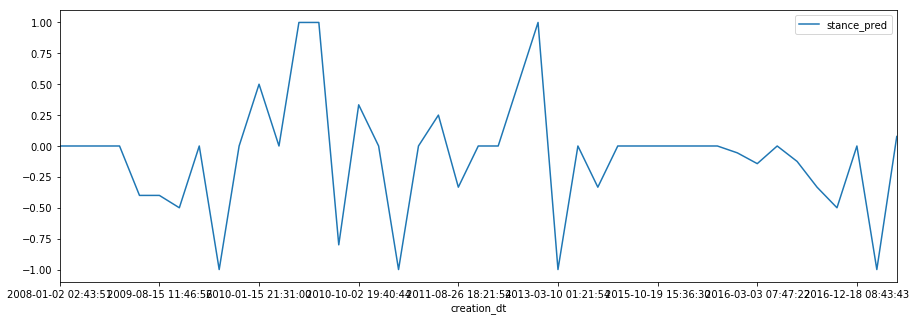

In [123]:
plt.figure(figsize=(15,5))
epp.plot.line(figsize=(15,5))
#plt.plot(epp.)